Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the dataset
df = pd.read_csv("task01_Dataset.csv", encoding='utf-8')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [3]:
#Check the basic information
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [4]:
# Finding Null values
df.isnull().sum()/df.shape[0]*100

Country Name      0.00000
Country Code      0.00000
Indicator Name    0.00000
Indicator Code    0.00000
1960              0.75188
                   ...   
2018              0.37594
2019              0.37594
2020              0.37594
2021              0.37594
2022              0.37594
Length: 67, dtype: float64

In [5]:
#Drop unwanted columns
df.drop(columns=['Country Code','Indicator Name'],inplace=True)

In [7]:
# filter data for total population
total_population_df=df[df['Indicator Code']=='SP.POP.TOTL']
total_population_df

,Country Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [8]:
# sort data based on total population for 2022
total_population_sort = total_population_df.sort_values(by='2022',ascending=False)
total_population_sort

,Country Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
259,World,SP.POP.TOTL,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,...,7.229303e+09,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09
103,IDA & IBRD total,SP.POP.TOTL,2.297972e+09,2.329504e+09,2.374276e+09,2.431314e+09,2.488809e+09,2.547220e+09,2.608583e+09,2.670092e+09,...,6.079502e+09,6.160290e+09,6.240231e+09,6.319805e+09,6.399653e+09,6.477695e+09,6.553978e+09,6.627317e+09,6.695488e+09,6.754030e+09
140,Low & middle income,SP.POP.TOTL,2.243179e+09,2.274050e+09,2.318173e+09,2.374537e+09,2.431355e+09,2.489219e+09,2.550049e+09,2.610859e+09,...,6.000647e+09,6.081161e+09,6.160876e+09,6.240319e+09,6.320334e+09,6.399037e+09,6.476093e+09,6.549996e+09,6.618837e+09,6.678280e+09
156,Middle income,SP.POP.TOTL,2.107416e+09,2.135116e+09,2.175940e+09,2.228877e+09,2.282094e+09,2.336193e+09,2.393145e+09,2.449880e+09,...,5.446811e+09,5.513458e+09,5.578703e+09,5.642636e+09,5.706387e+09,5.768171e+09,5.827338e+09,5.882943e+09,5.933587e+09,5.974552e+09
102,IBRD only,SP.POP.TOTL,1.904347e+09,1.926043e+09,1.960606e+09,2.007061e+09,2.053555e+09,2.100537e+09,2.150132e+09,2.199466e+09,...,4.567978e+09,4.616585e+09,4.663653e+09,4.709004e+09,4.753252e+09,4.794556e+09,4.832929e+09,4.867092e+09,4.895373e+09,4.913887e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,British Virgin Islands,SP.POP.TOTL,7.850000e+03,7.885000e+03,7.902000e+03,7.919000e+03,7.949000e+03,8.018000e+03,8.139000e+03,8.337000e+03,...,2.865700e+04,2.897100e+04,2.936600e+04,2.973900e+04,3.006000e+04,3.033500e+04,3.061000e+04,3.091000e+04,3.112200e+04,3.130500e+04
188,Palau,SP.POP.TOTL,9.446000e+03,9.639000e+03,9.851000e+03,1.007600e+04,1.031800e+04,1.056300e+04,1.081300e+04,1.099200e+04,...,1.780500e+04,1.779600e+04,1.779400e+04,1.781600e+04,1.783700e+04,1.786400e+04,1.791600e+04,1.797200e+04,1.802400e+04,1.805500e+04
179,Nauru,SP.POP.TOTL,4.582000e+03,4.753000e+03,4.950000e+03,5.198000e+03,5.484000e+03,5.804000e+03,6.021000e+03,6.114000e+03,...,1.069400e+04,1.094000e+04,1.118500e+04,1.143700e+04,1.168200e+04,1.192400e+04,1.213200e+04,1.231500e+04,1.251100e+04,1.266800e+04
245,Tuvalu,SP.POP.TOTL,5.404000e+03,5.436000e+03,5.471000e+03,5.503000e+03,5.525000e+03,5.548000e+03,5.591000e+03,5.657000e+03,...,1.091800e+04,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04


In [9]:
# get top 10 countries with the highest population for 2022
top_ten_countries = total_population_sort.head(10)
print("Top Ten Counteies Of Total Population:-")
print(top_ten_countries)

Top Ten Counteies Of Total Population:-
                   Country Name Indicator Code          1960          1961  \
259                       World    SP.POP.TOTL  3.031474e+09  3.072422e+09   
103            IDA & IBRD total    SP.POP.TOTL  2.297972e+09  2.329504e+09   
140         Low & middle income    SP.POP.TOTL  2.243179e+09  2.274050e+09   
156               Middle income    SP.POP.TOTL  2.107416e+09  2.135116e+09   
102                   IBRD only    SP.POP.TOTL  1.904347e+09  1.926043e+09   
62   Early-demographic dividend    SP.POP.TOTL  9.794615e+08  1.004319e+09   
139         Lower middle income    SP.POP.TOTL  9.058328e+08  9.276212e+08   
249         Upper middle income    SP.POP.TOTL  1.201583e+09  1.207494e+09   
63          East Asia & Pacific    SP.POP.TOTL  1.043334e+09  1.045203e+09   
142   Late-demographic dividend    SP.POP.TOTL  1.095549e+09  1.097729e+09   

             1962          1963          1964          1965          1966  \
259  3.126850e+09  3.193

In [10]:
# Data visualization
def add_value_labels(ax,spacing=10):
    for rect in ax.patches:
        x=rect.get_x()+rect.get_width()/2
        y=rect.get_height()-3
        
        va='bottom' if y>=0 else 'top'
        label= '()'.format(y) 
        y_shift = spacing * (1 if y >= 0 else -1)
        ax.annotate(label,(x,y),xytext=(0,y_shift),textcoords="offset points",ha='center',va=va)

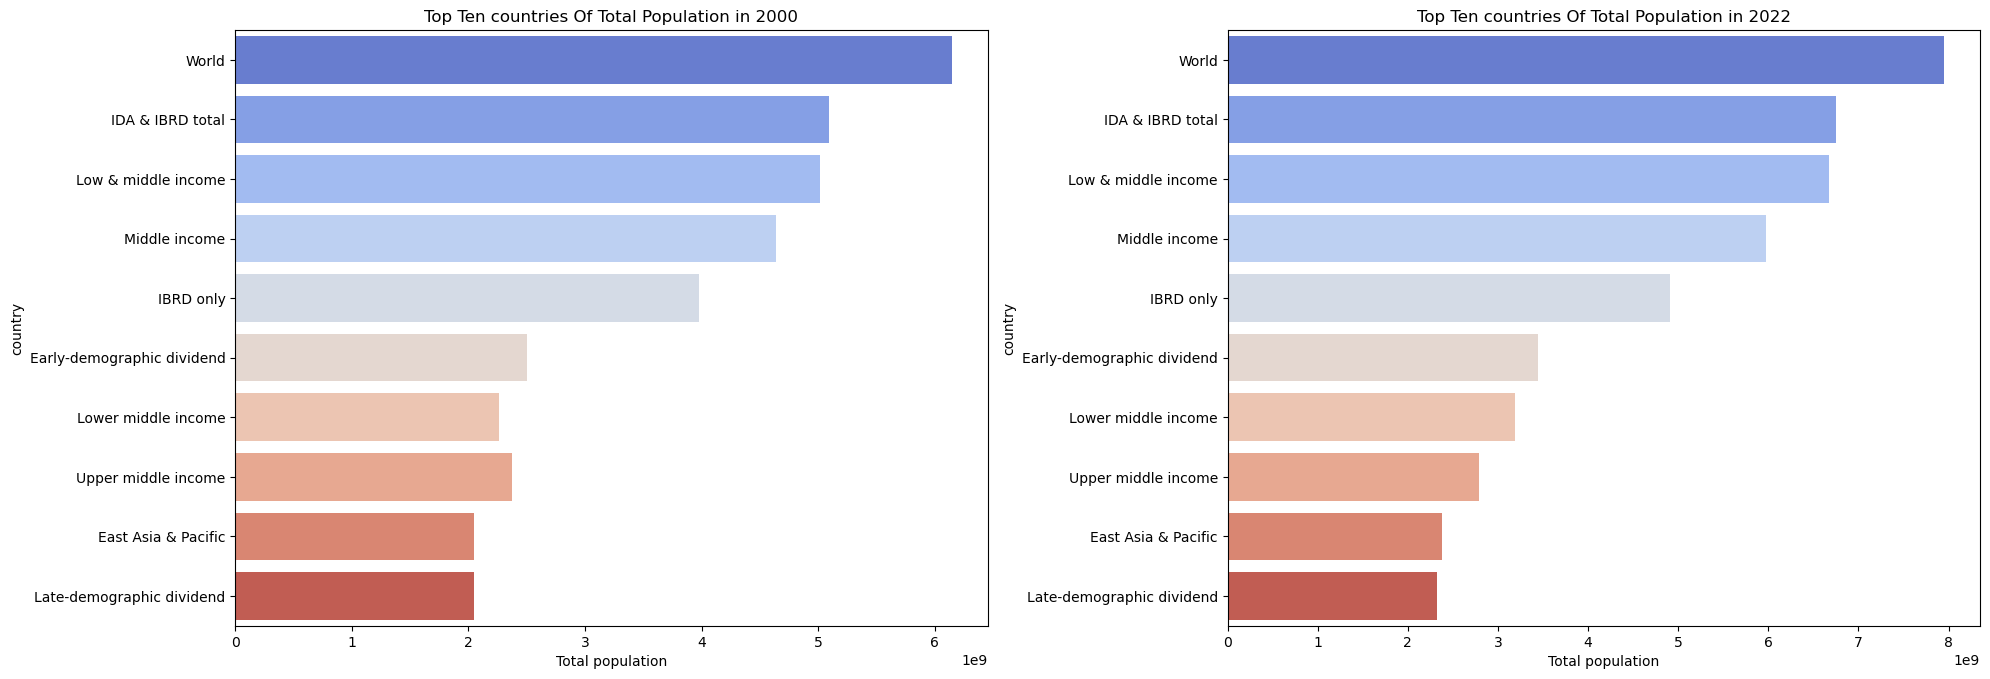

In [11]:
# creat a bar plot
plt.figure(figsize=(20,13))
plt.rcParams['axes.facecolor']=="black"

plt.subplot(2,2,1)
plot=sns.barplot(x='2000',y="Country Name",data=top_ten_countries,palette="coolwarm")
plt.title("Top Ten countries Of Total Population in 2000")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.subplot(2,2,2)
plot=sns.barplot(x='2022',y="Country Name",data=top_ten_countries,palette="coolwarm")
plt.title("Top Ten countries Of Total Population in 2022")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.tight_layout()

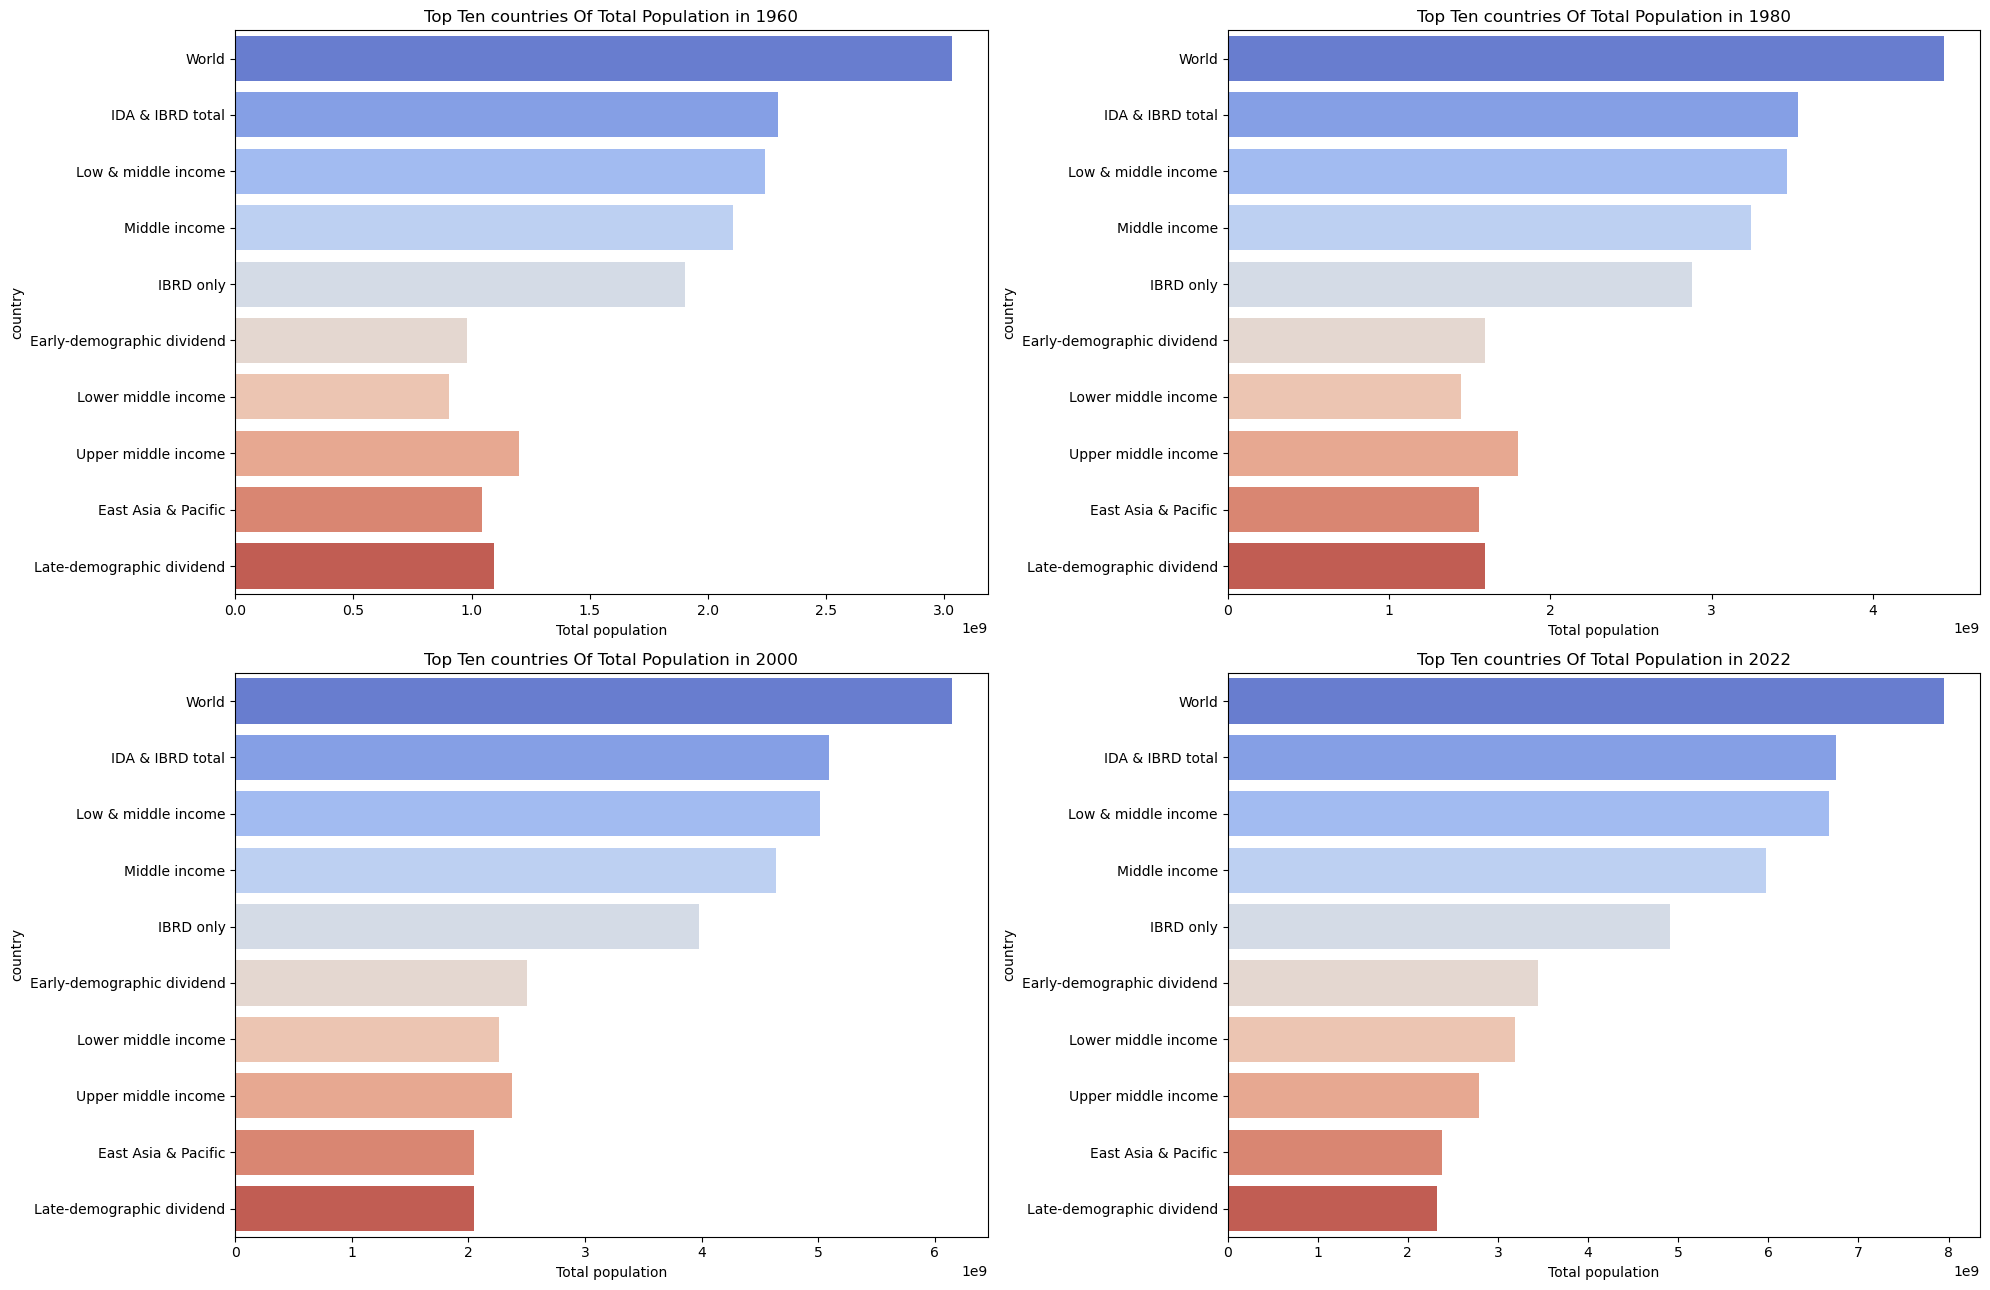

In [12]:
# creat a bar plot
plt.figure(figsize=(20,13))
plt.rcParams['axes.facecolor']=="black"

plt.subplot(2,2,1)
plot=sns.barplot(x='1960',y="Country Name",data=top_ten_countries,palette="coolwarm")
plt.title("Top Ten countries Of Total Population in 1960")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.subplot(2,2,2)
plot=sns.barplot(x='1980',y="Country Name",data=top_ten_countries,palette="coolwarm")
plt.title("Top Ten countries Of Total Population in 1980")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.subplot(2,2,3)
plot=sns.barplot(x='2000',y="Country Name",data=top_ten_countries,palette="coolwarm")
plt.title("Top Ten countries Of Total Population in 2000")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.subplot(2,2,4)
plot=sns.barplot(x='2022',y="Country Name",data=top_ten_countries,palette="coolwarm")
plt.title("Top Ten countries Of Total Population in 2022")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.tight_layout()

In [13]:
# sort data based on total population for 2022
total_population_sort_bt = total_population_df.sort_values(by='2022',ascending=True)
total_population_sort_bt

,Country Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
245,Tuvalu,SP.POP.TOTL,5.404000e+03,5.436000e+03,5.471000e+03,5.503000e+03,5.525000e+03,5.548000e+03,5.591000e+03,5.657000e+03,...,1.091800e+04,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04
179,Nauru,SP.POP.TOTL,4.582000e+03,4.753000e+03,4.950000e+03,5.198000e+03,5.484000e+03,5.804000e+03,6.021000e+03,6.114000e+03,...,1.069400e+04,1.094000e+04,1.118500e+04,1.143700e+04,1.168200e+04,1.192400e+04,1.213200e+04,1.231500e+04,1.251100e+04,1.266800e+04
188,Palau,SP.POP.TOTL,9.446000e+03,9.639000e+03,9.851000e+03,1.007600e+04,1.031800e+04,1.056300e+04,1.081300e+04,1.099200e+04,...,1.780500e+04,1.779600e+04,1.779400e+04,1.781600e+04,1.783700e+04,1.786400e+04,1.791600e+04,1.797200e+04,1.802400e+04,1.805500e+04
255,British Virgin Islands,SP.POP.TOTL,7.850000e+03,7.885000e+03,7.902000e+03,7.919000e+03,7.949000e+03,8.018000e+03,8.139000e+03,8.337000e+03,...,2.865700e+04,2.897100e+04,2.936600e+04,2.973900e+04,3.006000e+04,3.033500e+04,3.061000e+04,3.091000e+04,3.112200e+04,3.130500e+04
147,St. Martin (French part),SP.POP.TOTL,4.135000e+03,4.258000e+03,4.388000e+03,4.524000e+03,4.666000e+03,4.832000e+03,5.044000e+03,5.294000e+03,...,3.563900e+04,3.526100e+04,3.502000e+04,3.481100e+04,3.449600e+04,3.385200e+04,3.312100e+04,3.255300e+04,3.194800e+04,3.179100e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Middle income,SP.POP.TOTL,2.107416e+09,2.135116e+09,2.175940e+09,2.228877e+09,2.282094e+09,2.336193e+09,2.393145e+09,2.449880e+09,...,5.446811e+09,5.513458e+09,5.578703e+09,5.642636e+09,5.706387e+09,5.768171e+09,5.827338e+09,5.882943e+09,5.933587e+09,5.974552e+09
140,Low & middle income,SP.POP.TOTL,2.243179e+09,2.274050e+09,2.318173e+09,2.374537e+09,2.431355e+09,2.489219e+09,2.550049e+09,2.610859e+09,...,6.000647e+09,6.081161e+09,6.160876e+09,6.240319e+09,6.320334e+09,6.399037e+09,6.476093e+09,6.549996e+09,6.618837e+09,6.678280e+09
103,IDA & IBRD total,SP.POP.TOTL,2.297972e+09,2.329504e+09,2.374276e+09,2.431314e+09,2.488809e+09,2.547220e+09,2.608583e+09,2.670092e+09,...,6.079502e+09,6.160290e+09,6.240231e+09,6.319805e+09,6.399653e+09,6.477695e+09,6.553978e+09,6.627317e+09,6.695488e+09,6.754030e+09
259,World,SP.POP.TOTL,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,...,7.229303e+09,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09


In [14]:
top_ten_bt_countries = total_population_sort_bt.head(10)
print("Top Ten Bottom Counteies Of Total Population:-")
print(top_ten_bt_countries)

Top Ten Bottom Counteies Of Total Population:-
                 Country Name Indicator Code     1960     1961     1962  \
245                    Tuvalu    SP.POP.TOTL   5404.0   5436.0   5471.0   
179                     Nauru    SP.POP.TOTL   4582.0   4753.0   4950.0   
188                     Palau    SP.POP.TOTL   9446.0   9639.0   9851.0   
255    British Virgin Islands    SP.POP.TOTL   7850.0   7885.0   7902.0   
147  St. Martin (French part)    SP.POP.TOTL   4135.0   4258.0   4388.0   
84                  Gibraltar    SP.POP.TOTL  21822.0  21907.0  22249.0   
212                San Marino    SP.POP.TOTL  15556.0  15895.0  16242.0   
149                    Monaco    SP.POP.TOTL  21797.0  21907.0  22106.0   
137             Liechtenstein    SP.POP.TOTL  16472.0  16834.0  17221.0   
155          Marshall Islands    SP.POP.TOTL  15374.0  15867.0  16387.0   

        1963     1964     1965     1966     1967  ...     2013     2014  \
245   5503.0   5525.0   5548.0   5591.0   5657.0  ..

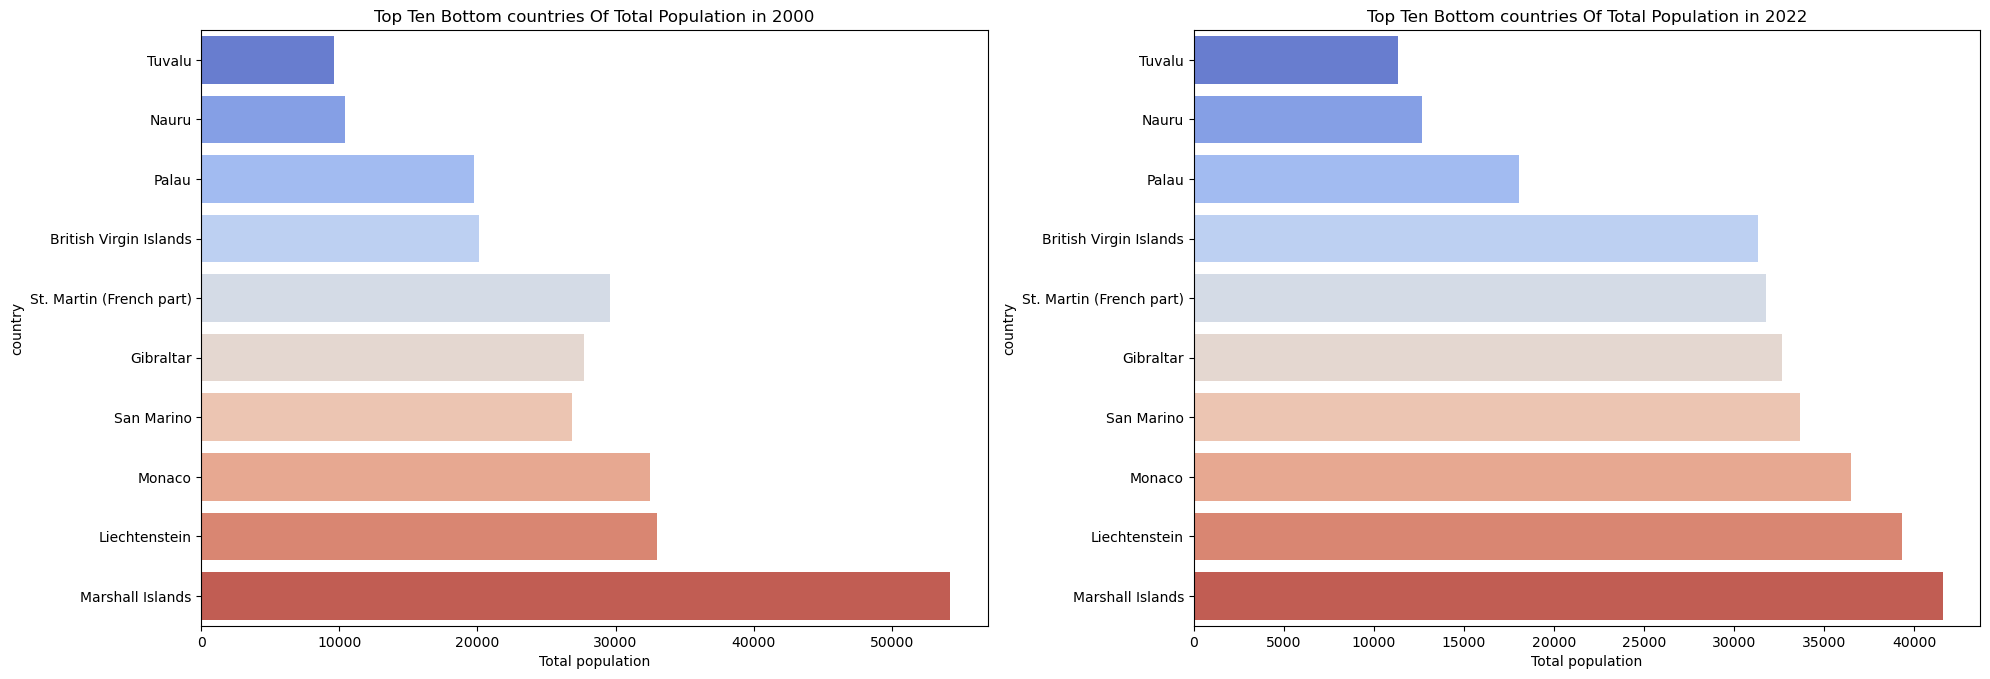

In [15]:
# creat a bar plot
plt.figure(figsize=(20,13))
plt.rcParams['axes.facecolor']=="black"

plt.subplot(2,2,1)
plot=sns.barplot(x='2000',y="Country Name",data=top_ten_bt_countries,palette="coolwarm")
plt.title("Top Ten Bottom countries Of Total Population in 2000")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.subplot(2,2,2)
plot=sns.barplot(x='2022',y="Country Name",data=top_ten_bt_countries,palette="coolwarm")
plt.title("Top Ten Bottom countries Of Total Population in 2022")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.tight_layout()

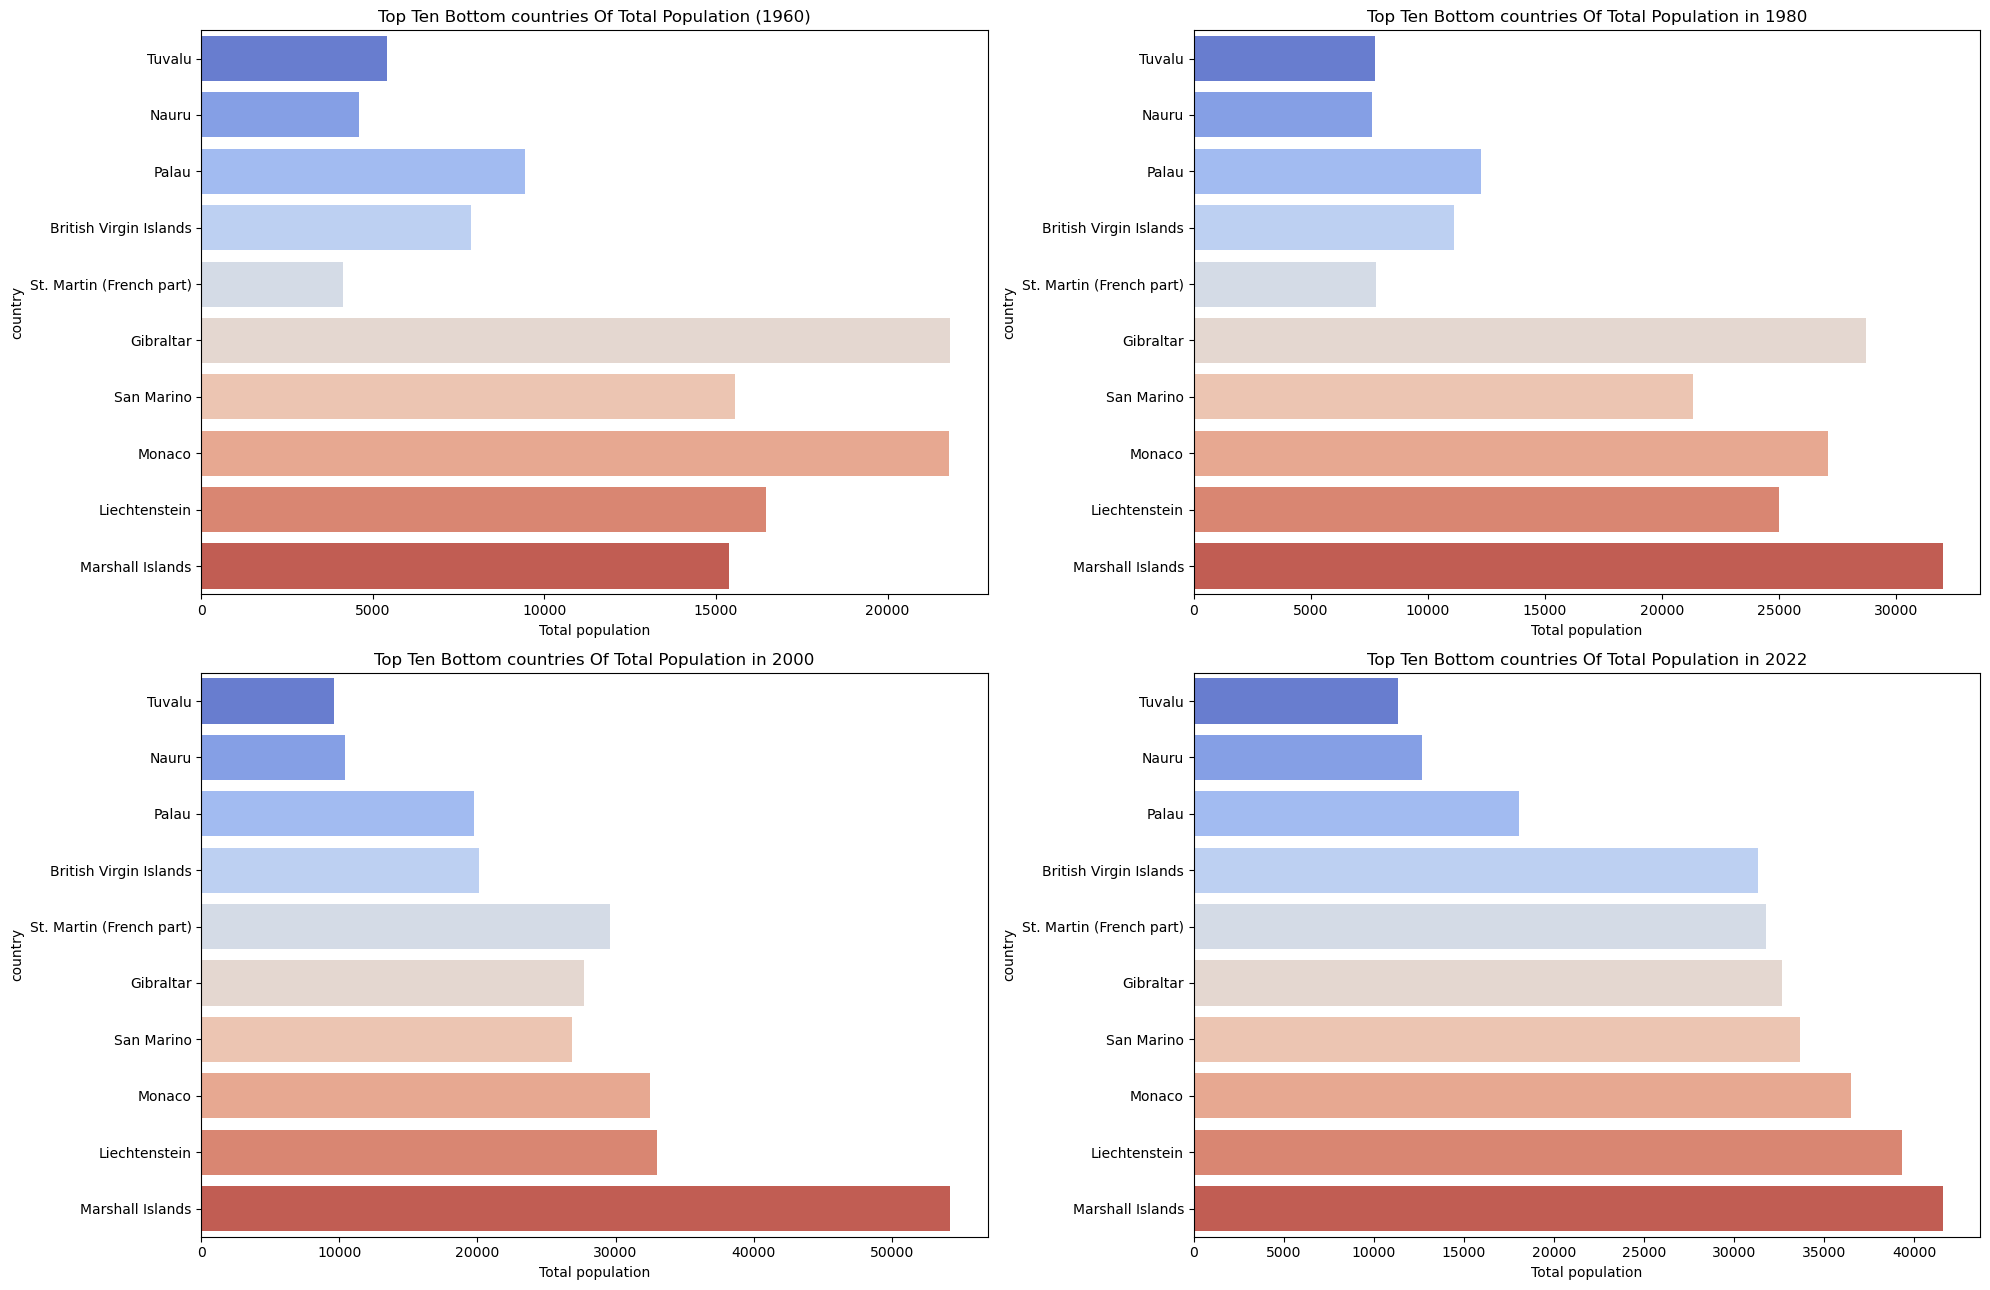

In [16]:
# creat a bar plot
plt.figure(figsize=(20,13))
plt.rcParams['axes.facecolor']=="black"

plt.subplot(2,2,1)
plot=sns.barplot(x='1960',y="Country Name",data=top_ten_bt_countries,palette="coolwarm")
plt.title("Top Ten Bottom countries Of Total Population (1960)")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.subplot(2,2,2)
plot=sns.barplot(x='1980',y="Country Name",data=top_ten_bt_countries,palette="coolwarm")
plt.title("Top Ten Bottom countries Of Total Population in 1980")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.subplot(2,2,3)
plot=sns.barplot(x='2000',y="Country Name",data=top_ten_bt_countries,palette="coolwarm")
plt.title("Top Ten Bottom countries Of Total Population in 2000")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.subplot(2,2,4)
plot=sns.barplot(x='2022',y="Country Name",data=top_ten_bt_countries,palette="coolwarm")
plt.title("Top Ten Bottom countries Of Total Population in 2022")
plt.xlabel("Total population")
plt.ylabel("country")
add_value_labels(plot)

plt.tight_layout()

In [17]:
total_population_sort['Country Name'].unique()

array(['World', 'IDA & IBRD total', 'Low & middle income',
       'Middle income', 'IBRD only', 'Early-demographic dividend',
       'Lower middle income', 'Upper middle income',
       'East Asia & Pacific', 'Late-demographic dividend',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'South Asia',
       'South Asia (IDA & IBRD)', 'IDA total', 'India', 'China',
       'OECD members', 'High income', 'IDA only', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (IDA & IBRD countries)',
       'Sub-Saharan Africa (excluding high income)',
       'Least developed countries: UN classification',
       'Post-demographic dividend', 'Pre-demographic dividend',
       'Fragile and conflict affected situations',
       'Europe & Central Asia', 'Heavily indebted poor countries (HIPC)',
       'Africa Eastern and Southern', 'Low income',
       'Latin America & Caribbean',
       'Latin America & the Caribbean (IDA & IBRD countries)',
    

Enter Country Name: Iceland


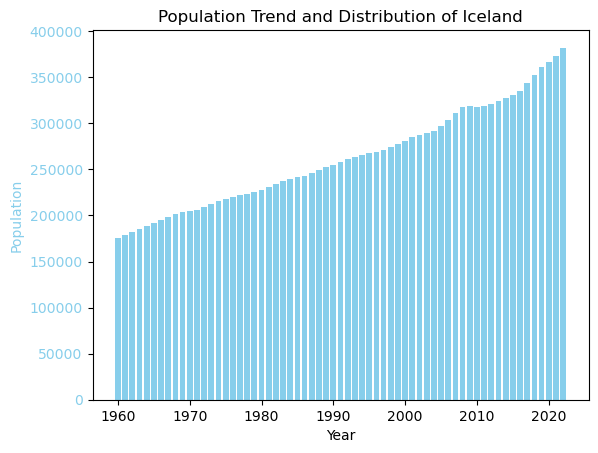

In [18]:
# Filter data for the chosen country
chosen_country = input("Enter Country Name:")
country_data = total_population_df[total_population_df['Country Name'] == chosen_country]

# Extract years and population data
years = country_data.columns[2:].astype(int)
population = country_data.iloc[:, 2:].values.flatten()

# Bar chart - Population over the years
plt.bar(years, population, color='skyblue', label='Population')
plt.xlabel('Year')
plt.ylabel('Population', color='skyblue')
plt.title(f'Population Trend and Distribution of {chosen_country}')
plt.tick_params(axis='y', labelcolor='skyblue')
plt.show()